# Tutorial 09

In [40]:
import d_dmrg
import a_mps
import b_model
from tqdm.autonotebook import tqdm
import tfi_exact
import numpy as np
from matplotlib import pyplot as plt

In [23]:
model = b_model.TFIModel(10,1.,1.)

In [27]:
L = 14
g = 1.5
J = 1.

psi0 = a_mps.init_spinup_MPS(L)
model = b_model.TFIModel(L,g,J)
dmrg = d_dmrg.DMRGEngine(psi0, model)



In [28]:
for i in range(5):
    dmrg.sweep()
    print(model.energy(psi0))

-22.284193390741905
-22.265735042280827
-22.265734925392344
-22.26573492539236
-22.26573492539236


In [30]:
print(tfi_exact.finite_gs_energy(L, g, J))

-22.2657349253924


In [44]:
def dmrg_sim(L, g, J, epsilon=1e-8, max_sweeps=50):
    """
    Perfom a full DMRG simulation.
    """

    psi0 = a_mps.init_spinup_MPS(L)
    model = b_model.TFIModel(L,g,J)
    dmrg = d_dmrg.DMRGEngine(psi0, model)

    previous_E = model.energy(psi0)
    for i in range(max_sweeps):
        dmrg.sweep()
        E = model.energy(psi0)

        if abs(previous_E-E) < epsilon:
            break

        previous_E = E

    return model, psi0

In [45]:
model, state = dmrg_sim(L, g, J)
print(model.energy(state))

-136.06789993425835


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

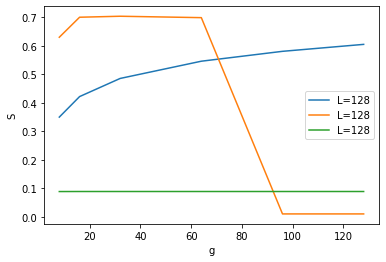

In [46]:
# d)

Ls = [8,16,32,64, 96, 128]
gs = [1., 1.5, 0.5]
J = 1.


for g in tqdm(gs):
    entropies = []
    for L in tqdm(Ls):
        model, psi = dmrg_sim(L, g, J)
        entropies.append(psi.entanglement_entropy()[int(L/2)])

    plt.plot(Ls, entropies, label="g={}".format(g))

plt.xlabel("g")
plt.ylabel("S")
plt.legend()
plt.show()

In [48]:
entropies_g1 = []
for L in Ls:
    model, psi = dmrg_sim(L, 1., J)
    entropies_g1.append(psi.entanglement_entropy()[int(L/2)])

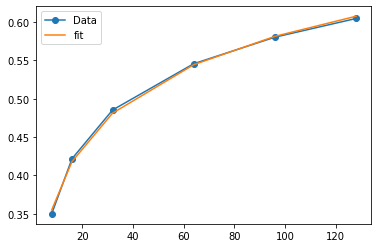

In [52]:
coeff = np.polyfit(np.log(Ls), entropies_g1, 1)

plt.plot(Ls, entropies_g1, "o-", label="Data")
plt.plot(Ls, coeff[1] + coeff[0]*np.log(Ls), label="fit")
plt.legend()
plt.show()


print("Central charge ={}". format(coeff[0]*6))